<a href="https://colab.research.google.com/github/jotix16/Machine-Learning/blob/master/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy , random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pylab

In [11]:
def solve(N):
    '''
    Solves the optimization problem for SVM (!! no slack variables yet)
    '''
    global C
    constraint={'type':'eq', 'fun':zerofun}
    ret = minimize(objective , numpy.zeros([N,1]), bounds=[(0,C) for b in range(N)],constraints=constraint)
    alpha = ret['x']
    return alpha

In [3]:
def kernel(x1,x2):
    '''
    Calculates one of three kernels for a pair of vectors.
    (linear, polynomial and radial_basis)
    '''
    
    global kernel_type, p, sigma
    if kernel_type == "polynomial":
        res = numpy.power((x1.dot(x2)+1),p)

    elif kernel_type ==  "radial_basis":
        res = numpy.exp(-0.5*numpy.linalg.norm(x1-x2)/sigma)

    else:
        res = x1.dot(x2);

    return res

In [4]:
def objective(a):
    '''
    Dual function to be minimized
    '''
    global P
    a = a.reshape(len(a),1)
    return 0.5*numpy.sum(a.dot(a.T)*P) - numpy.sum(a)
    

In [5]:
def zerofun(a):
    '''
    Encodes the equality constraint for the optimization problem
    '''
    global targets
    return a.dot(targets)
    

In [6]:
def indicator(s):
    '''
    Returns the class point s is classified to
    '''
    global b
    totsum = 0
    for value in nonzero:
        totsum += value[0] * value[2] * kernel(s, value[1])
    return totsum - b

In [7]:
def calc_b(nonzero):
    '''
    Calculates b after we have optimized for a
    '''
    bsum = 0
    for value in nonzero:
        bsum += value[0] * value[2] * kernel(value[1], nonzero[0][1])
    print(value[2])
    return bsum - nonzero[0][2]


In [146]:
def visualize():
    '''
    Draws the conture that seperates the data based on SVM
    '''
    global kernel_type, C, p, sigma
    
    # Plot the data
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

    # Draw the conture
    xgrid = numpy.linspace(-2,2)
    ygrid = numpy.linspace(-2,2)
    grid = numpy.array([[indicator(numpy.array([x,y])) for x in xgrid] for y in ygrid])
    plt.contour(xgrid, ygrid, grid, (-1.0,0.0,1.0), colors=('red','black','blue'), linewidths=(1,3,1))
    plt.axis('equal')   # Force same scale on both axes
    plt.title('Kernel: '+str(kernel_type)+' sigma: '+str(sigma))
    # Save
    plt.savefig('Plots/'+str(kernel_type)+'_'+str(sigma)+'.png')
    
    plt.show() # Show the plot on the screen
    

In [103]:
def generate_data():
    '''
    Samples random data from 2 classes
    '''
    #Uncomment for debugging
    numpy.random.seed(100)
    classA = numpy.concatenate((numpy.random.randn(20,2) * 0.2 + [0.7,0.5],numpy.random.randn(20,2) * 0.2 + [-1,0.5]))
    classB = numpy.random.randn(20,2) * 0.2 + [0.0,-0.3]
    
    inputs = numpy.concatenate((classA,classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[ 0 ] ) ,-numpy.ones(classB.shape[0])))
    
    # Permute
    N = inputs.shape[0] # Number of rows (samples)
    permute=list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute,:]
    targets = targets [permute]
    
    return classA, classB, inputs, targets

1.0


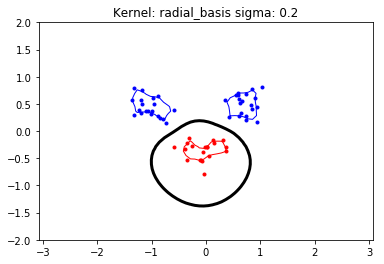

In [159]:
global kernel_type, p, sigma, inputs, targets, P, b, C
# Kernel parameters
#kernel_type = "linear"
#kernel_type = "polynomial"
kernel_type = "radial_basis"
p = 20
sigma = 0.2
C = None
# Generated data
classA,classB,inputs,targets = generate_data() # generate data
targets = targets.reshape(len(targets),1)

# Calculate matrix P
P = numpy.array([[kernel(x_1,x_2) for x_1 in inputs] for x_2 in inputs])
P = P * targets.dot(targets.T)

# Solve
a = solve(inputs.shape[0])
nonzero = [(a[i], inputs[i,:], targets[i][0]) for i in range(len(a)) if abs(a[i]) > 10e-5]
b = calc_b(nonzero)

# plot
visualize()
